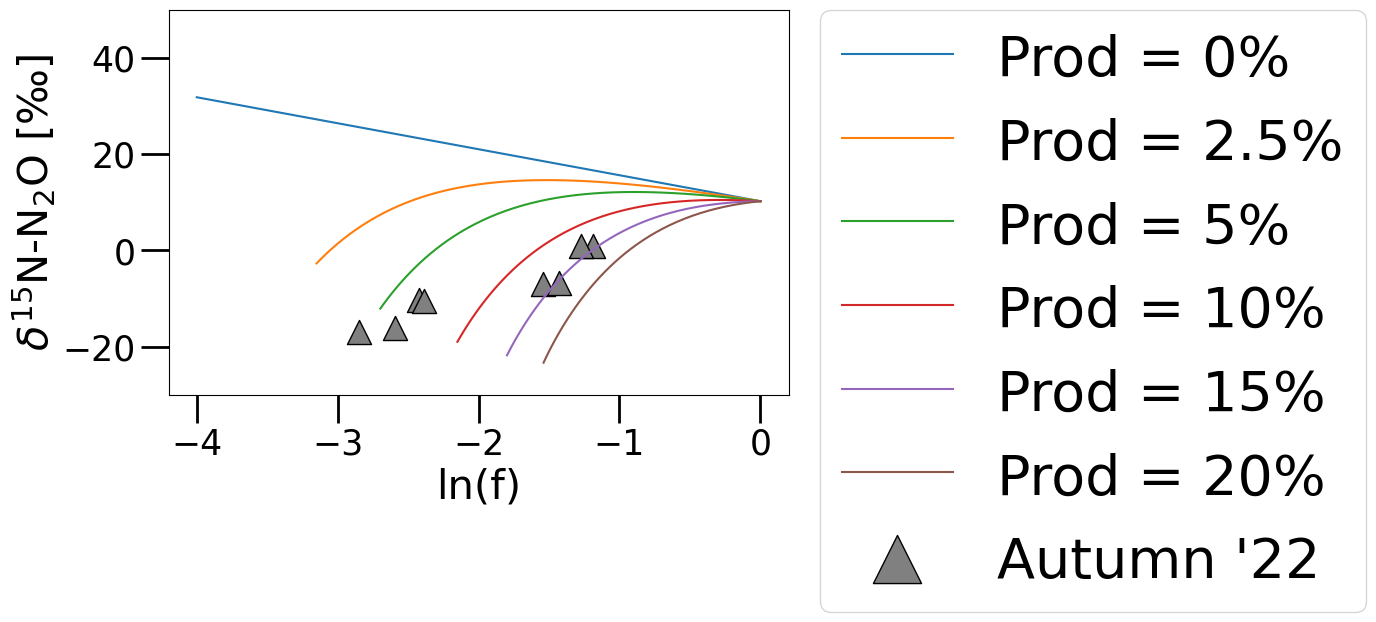

In [1]:
### Model to simulate simultaneous N2O production and consumption - Closed system approach 



import numpy as np
import matplotlib.pyplot as plt

# Set global font sizes
plt.rcParams.update({
    "font.size": 14,  # Adjust font size globally
    "axes.labelsize": 18,  # Axis labels
    "axes.titlesize": 18,  # Title size
    "xtick.labelsize": 18,  # X-axis tick labels
    "ytick.labelsize": 18,  # Y-axis tick labels
    "legend.fontsize": 24,  # Legend font size
})

# Given constants
initial_N2O_pool = 96 # Initial N2O pool (nM)
d15N_initial = 10.2 # δ15N of initial N2O pool (‰)
e_N2Ored = 5.4 # Isotope effect for N2O reduction (‰)
#initial_NO3_pool = 66.8 # Initial nitrate pool (nM)
#NO3_residual = 13 # Residual nitrate (nM)


d15NO3_initial = 9.5 # δ15N of nitrate (‰)

e_N2Oprod = -38  # Isotope effect for N2O production (‰)

# Define ranges for iteration
ln_f_original_range = np.linspace(-4,0, 50)  # Example range from -1 to 0
perc_N2O_prod_values = [0, 2.5, 5, 10, 15, 20]  # Different percentages of N2O production

# In-situ data points
d15N_insitu = np.array([0.8,-7.0,-17.0,-10.4,0.9,-6.8,-16.2,-10.5])
ln_f_insitu = np.array([-1.19,-1.54,-2.85,-2.42,-1.27,-1.43,-2.59,-2.39])


# Plot setup
plt.figure(figsize=(8, 5))

# Loop through different percentages of N2O production
for perc_N2O_prod in perc_N2O_prod_values:
    d15N_results = []
    ln_f_new_results = []

    for ln_f_original in ln_f_original_range:
        f_N2O_original = np.exp(ln_f_original)  # Fraction remaining for reduced N2O

        # Residual N2O follows the Rayleigh equation (closed system for reduction)
        f_N2O_original = np.exp(ln_f_original)
        N2O_residual = initial_N2O_pool * f_N2O_original
        d15N_residual = d15N_initial - e_N2Ored * ln_f_original

        # Newly produced N2O from NO3, open system
        d15N_N2Oprod = d15NO3_initial + e_N2Oprod

        # Calculate amount of new N2O based on percentage
        new_N2O = (perc_N2O_prod / 100) * (initial_N2O_pool * (1 - f_N2O_original))

        # Total N2O pool after production and reduction
        N2O_total = new_N2O + initial_N2O_pool * f_N2O_original
        ln_f_new = np.log(N2O_total / initial_N2O_pool)

        # Fraction of newly produced and residual N2O
        f_newly_prod = new_N2O / N2O_total
        f_residual = (initial_N2O_pool * f_N2O_original) / N2O_total

        # Mixing the two contributions to get the overall δ15N
        d15N_mix = f_newly_prod * d15N_N2Oprod + f_residual * d15N_residual

        if ln_f_new <= 0:  # Only include data where ln(f_new) <= 0
            d15N_results.append(d15N_mix)
            ln_f_new_results.append(ln_f_new)

    # Plot line for this N2O production percentage
    plt.plot(ln_f_new_results, d15N_results, label=f'Prod = {perc_N2O_prod}%')


# Plot in-situ data points
plt.scatter(ln_f_insitu, d15N_insitu, color='grey', marker='^', label="Autumn '22", edgecolor='black', linewidth=1, s=300)

# Labels and title
plt.xlabel("ln(f)", fontsize=30)
plt.ylabel("$\delta^{15}$N-N$_{2}$O [‰]", fontsize=30)
plt.ylim(-30, 50)  # Set y-axis limits
plt.tick_params(axis='both', which='major', labelsize=25, length=20, width=2)
plt.grid(False)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0., markerscale=2, handleheight=1, fontsize=40)



# Show plot
plt.show()